<a href="https://colab.research.google.com/github/MuhammadBilal848/Deep-Learning-Practice/blob/main/Neural%20Network%20Implementation%20On%20MNIST%20(Accuracy%2091%25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# Importing MNIST Dataset from **Keras** Library

In [ ]:
(xtrain,ytrain) , (xtest,ytest) = keras.datasets.mnist.load_data()

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## xtrain is containing images of data.

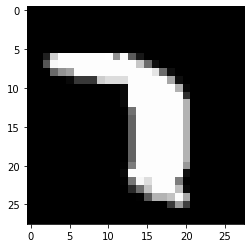

In [ ]:
plt.imshow(xtrain[np.random.randint(0,60001,1)[0]],cmap ='gray')

## ytrain is containing values between 0 to 9 representing each image.

In [ ]:
ytrain[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### First we flatten the array of images using reshape of numpy.
### Currently the shap is 60000,28,28 , 60000 images of 28 by 28 pixels. 
### We need to flatten the array to have 60000 images of 28*28 pixels.
### We will scale the values between 0 and 1 by dividing 255

In [ ]:
xtrain_flt = (xtrain.reshape((60000,28*28)))/225
xtest_flt = (xtest.reshape((10000,28*28)))/255

### Now we define out simple neural network of only 1 layer(output layer).

In [ ]:
model = keras.Sequential([
    # keras.layers.Dense(# of output layer neurons,input_shape(any_shape),activation = 'your_choice')
    keras.layers.Dense(units = 10, input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(xtrain_flt,ytrain,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4511 - accuracy: 0.8806
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3000 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2810 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2719 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2655 - accuracy: 0.9256


### Accuracy on test set is 92%

In [ ]:
model.evaluate(xtest_flt,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2715 - accuracy: 0.9259


[0.27153223752975464, 0.9258999824523926]

### Image on 56th index is **4**.
### The model returned 10 values on 56th index predicting the accuracies of numbers being from 0 to 9.
### We can see that 4 has the highest accuracy.

In [ ]:
model.predict(xtest_flt)[56]

313/313 [==============================] - 1s 2ms/step


array([3.7840302e-03, 2.1960309e-07, 2.3955943e-02, 1.0491952e-02,
       9.9693382e-01, 6.1354570e-02, 1.4997752e-01, 2.2191955e-02,
       2.5823638e-01, 2.2561930e-01], dtype=float32)

In [ ]:
np.argmax(model.predict(xtest_flt)[56])

313/313 [==============================] - 0s 1ms/step


4

In [ ]:
predicted = model.predict(xtest_flt)
predicted = [ np.argmax(i) for i in predicted]

313/313 [==============================] - 0s 1ms/step



# Lets check confusion matrix

In [ ]:
cm = tf.math.confusion_matrix(labels = ytest , predictions = predicted )
px.imshow(cm,text_auto = True)

#### Lets add a hidden layer and see how adding the hidden layer improves the accuracy of the model.

In [ ]:
model = keras.Sequential([
          keras.layers.Dense(units = 100, input_shape = (784,) , activation = 'relu'), # hidden layer with random initialization of units
          keras.layers.Dense(units = 10,activation = 'sigmoid') # output layer
])

model.compile(
    optimizer = 'adam',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'

)

model.fit(xtrain_flt,ytrain,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2650 - accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1181 - accuracy: 0.9656
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0825 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0629 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0504 - accuracy: 0.9844


In [ ]:
model.evaluate(xtest_flt,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9740


[0.07987325638532639, 0.9739999771118164]

### We can observe that the accuracy jumped from 92% to 97%

In [ ]:
predicted97 = model.predict(xtest_flt)
predicted97 = [ np.argmax(i) for i in predicted97]
cm = tf.math.confusion_matrix(labels = ytest , predictions = predicted97 )
px.imshow(cm,text_auto = True)

313/313 [==============================] - 1s 2ms/step


# We can directly pass xtrain & xtest without flattening it explicitly using keras.layer.Flatten

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(units = 100, activation = 'relu'), # hidden layer with random initialization of units
    keras.layers.Dense(units = 10,activation = 'sigmoid') # output layer
])

model.compile(
    optimizer = 'adam',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

model.fit(xtrain,ytrain,epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1257 - accuracy: 0.8343
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3791 - accuracy: 0.9074
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2810 - accuracy: 0.9274
Epoch 4/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2435 - accuracy: 0.9368
Epoch 5/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2276 - accuracy: 0.9409
Epoch 6/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2115 - accuracy: 0.9449


In [ ]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.2429 - accuracy: 0.9449


[0.24291479587554932, 0.9448999762535095]

In [ ]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(units = 100, activation = 'leaky_relu'), # hidden layer with random initialization of units
    keras.layers.Dense(units = 10,activation = 'sigmoid') # output layer
])

model1.compile(
    optimizer = 'Adamax',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

model1.fit(xtrain,ytrain,epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 8s 4ms/step - loss: 5.8332 - accuracy: 0.8559
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5731 - accuracy: 0.9128
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9782 - accuracy: 0.9319
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7383 - accuracy: 0.9421
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6116 - accuracy: 0.9484
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5347 - accuracy: 0.9538


In [ ]:
model1.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.9136 - accuracy: 0.9340


[0.9135711193084717, 0.9340000152587891]

In [ ]:
model2 = keras.Sequential([
    keras.layers.Dense(units = 30,input_shape = (784,) ,activation = 'relu'),
    keras.layers.Dense(units = 60, activation = 'relu'),
    keras.layers.Dense(units = 10, activation = 'relu'), 
    keras.layers.Dense(units = 10,activation = 'sigmoid') # output layer
])

model2.compile(
    optimizer = 'Adam',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

model2.fit(xtrain_flt,ytrain,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3720 - accuracy: 0.8869
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1755 - accuracy: 0.9488
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1366 - accuracy: 0.9583
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1138 - accuracy: 0.9662
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0972 - accuracy: 0.9705
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0851 - accuracy: 0.9738
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0783 - accuracy: 0.9757
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0707 - accuracy: 0.9776
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0647 - accuracy: 0.9792
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.056

In [ ]:
model2.evaluate(xtest_flt,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1055 - accuracy: 0.9704


[0.10553692281246185, 0.9703999757766724]

In [ ]:
model3 = keras.Sequential([
    keras.layers.Dense(units = 40,input_shape = (784,) ,activation = 'relu'),
    keras.layers.Dense(units = 30, activation = 'relu'),
    keras.layers.Dense(units = 25, activation = 'relu'), 
    keras.layers.Dense(units = 20, activation = 'relu'),
    keras.layers.Dense(units = 10,activation = 'sigmoid') # output layer
])

model3.compile(
    optimizer = 'Adam',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

model3.fit(xtrain_flt,ytrain,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3416 - accuracy: 0.8983
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1574 - accuracy: 0.9523
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1226 - accuracy: 0.9626
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1017 - accuracy: 0.9679
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0886 - accuracy: 0.9724


In [ ]:
model3.evaluate(xtest_flt,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1053 - accuracy: 0.9664


[0.10533400624990463, 0.9664000272750854]

In [ ]:
model4 = keras.Sequential([
    keras.layers.Dense(units = 20,input_shape = (784,) ,activation = 'relu'),
    keras.layers.Dense(units = 10, activation = 'relu'),
    keras.layers.Dense(units = 8, activation = 'relu'), 
    keras.layers.Dense(units = 5, activation = 'leaky_relu'),
    keras.layers.Dense(units = 10,activation = 'sigmoid') # output layer
])

model4.compile(
    optimizer = 'Adamax',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

model4.fit(xtrain_flt,ytrain,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1822 - accuracy: 0.5989
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6091 - accuracy: 0.8300
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4596 - accuracy: 0.8743
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3811 - accuracy: 0.8975
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3339 - accuracy: 0.9108


In [ ]:
model4.evaluate(xtest_flt,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3323 - accuracy: 0.9102


[0.332279771566391, 0.9101999998092651]

In [ ]:
model0 = keras.Sequential([
    keras.layers.Dense(units = 30,input_shape = (784,) ,activation = 'relu'),
    keras.layers.Dense(units = 25, activation = 'relu'),
    keras.layers.Dense(units = 20, activation = 'relu'), 
    keras.layers.Dense(units = 20, activation = 'relu'),
    keras.layers.Dense(units = 10,activation = 'sigmoid') # output layer
])

model0.compile(
    optimizer = 'Adam',
    metrics = ['accuracy'],
    loss = 'sparse_categorical_crossentropy'
)

model0.fit(xtrain_flt,ytrain,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3973 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1837 - accuracy: 0.9459
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1469 - accuracy: 0.9567
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1244 - accuracy: 0.9619
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1112 - accuracy: 0.9661


In [ ]:
model0.evaluate(xtest_flt,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1277 - accuracy: 0.9619


[0.12766657769680023, 0.961899995803833]